# **1. Perkenalan Dataset**


# **Breast Cancer Dataset**
📌 Deskripsi Dataset Breast Cancer <br>
<br>Kanker payudara merupakan jenis kanker yang paling umum terjadi pada perempuan di seluruh dunia dan menyumbang sekitar 25% dari seluruh kasus kanker, dengan jutaan kasus baru setiap tahunnya. Penyakit ini ditandai oleh pertumbuhan sel payudara yang tidak terkendali dan umumnya membentuk tumor yang dapat diklasifikasikan sebagai ganas (malignant) atau jinak (benign), di mana klasifikasi yang akurat menjadi tantangan penting dalam proses diagnosis. Penelitian ini memanfaatkan Breast Cancer Dataset yang berisi karakteristik morfologi sel payudara dalam bentuk variabel numerik untuk membangun model klasifikasi berbasis machine learning. Selain berfokus pada akurasi prediksi, penelitian ini juga mengimplementasikan pendekatan MLOps dengan memanfaatkan MLflow untuk pengelolaan eksperimen dan versi model, serta Prometheus dan Grafana untuk memantau performa model.

<br>📊 Daftar Variabel Dataset Breast Cancer<br>
<br>1️⃣ Identitas & Target
| Variabel      | Penjelasan                                                                                                     |
| ------------- | -------------------------------------------------------------------------------------------------------------- |
| **id**        | Identitas unik untuk setiap sampel pasien                                                                      |
| **diagnosis** | Variabel target klasifikasi kanker payudara, dengan nilai **M (Malignant / ganas)** dan **B (Benign / jinak)** |

<br>2️⃣ Fitur Statistik Nilai Rata-rata (Mean)
| Variabel                   | Penjelasan                                                                 |
| -------------------------- | -------------------------------------------------------------------------- |
| **radius_mean**            | Nilai rata-rata radius lobus sel                                           |
| **texture_mean**           | Nilai rata-rata tekstur permukaan sel                                      |
| **perimeter_mean**         | Nilai rata-rata keliling luar lobus sel                                    |
| **area_mean**              | Nilai rata-rata luas area lobus sel                                        |
| **smoothness_mean**        | Nilai rata-rata tingkat kehalusan permukaan sel                            |
| **compactness_mean**       | Nilai rata-rata tingkat kepadatan sel                                      |
| **concavity_mean**         | Nilai rata-rata tingkat cekungan pada kontur sel                           |
| **concave points_mean**    | Nilai rata-rata jumlah titik cekung pada kontur sel                        |
| **symmetry_mean**          | Nilai rata-rata tingkat simetri bentuk sel                                 |
| **fractal_dimension_mean** | Nilai rata-rata dimensi fraktal yang menggambarkan kompleksitas bentuk sel |

<br>3️⃣ Fitur Standar Deviasi (Standard Error / SE)
| Variabel                 | Penjelasan                                          |
| ------------------------ | --------------------------------------------------- |
| **radius_se**            | Standard error dari radius lobus sel                |
| **texture_se**           | Standard error dari tekstur permukaan sel           |
| **perimeter_se**         | Standard error dari keliling lobus sel              |
| **area_se**              | Standard error dari luas area lobus sel             |
| **smoothness_se**        | Standard error dari tingkat kehalusan permukaan sel |
| **compactness_se**       | Standard error dari tingkat kepadatan sel           |
| **concavity_se**         | Standard error dari tingkat cekungan sel            |
| **concave points_se**    | Standard error dari jumlah titik cekung             |
| **symmetry_se**          | Standard error dari tingkat simetri sel             |
| **fractal_dimension_se** | Standard error dari dimensi fraktal sel             |

<br>4️⃣ Fitur Nilai Terburuk (Worst)
| Variabel                    | Penjelasan                                                              |
| --------------------------- | ----------------------------------------------------------------------- |
| **radius_worst**            | Nilai radius terbesar (terburuk) dari lobus sel                         |
| **texture_worst**           | Nilai tekstur terburuk dari permukaan sel                               |
| **perimeter_worst**         | Nilai keliling terbesar dari lobus sel                                  |
| **area_worst**              | Nilai luas area terbesar dari lobus sel                                 |
| **smoothness_worst**        | Nilai kehalusan terburuk dari permukaan sel                             |
| **compactness_worst**       | Nilai kepadatan terburuk dari sel                                       |
| **concavity_worst**         | Nilai cekungan terburuk dari kontur sel                                 |
| **concave points_worst**    | Jumlah titik cekung terbanyak dari kontur sel                           |
| **symmetry_worst**          | Nilai simetri terburuk dari bentuk sel                                  |
| **fractal_dimension_worst** | Nilai dimensi fraktal terburuk yang menunjukkan kompleksitas bentuk sel |


# **2. Import Library**

Pada tahap ini, Anda perlu mengimpor beberapa pustaka (library) Python yang dibutuhkan untuk analisis data dan pembangunan model machine learning atau deep learning.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px
import nbformat
import seaborn as sns
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.utils import resample, shuffle
import re
from sklearn.preprocessing import LabelEncoder, StandardScaler, MinMaxScaler, OrdinalEncoder
import joblib
from imblearn.under_sampling import RandomUnderSampler
from imblearn.under_sampling import NearMiss
from imblearn.over_sampling import SMOTE

from sklearn.preprocessing import RobustScaler
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, BaggingClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from sklearn.naive_bayes import GaussianNB, BernoulliNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.decomposition import PCA

# **3. Memuat Dataset**

Pada tahap ini, Anda perlu memuat dataset ke dalam notebook. Jika dataset dalam format CSV, Anda bisa menggunakan pustaka pandas untuk membacanya. Pastikan untuk mengecek beberapa baris awal dataset untuk memahami strukturnya dan memastikan data telah dimuat dengan benar.

Jika dataset berada di Google Drive, pastikan Anda menghubungkan Google Drive ke Colab terlebih dahulu. Setelah dataset berhasil dimuat, langkah berikutnya adalah memeriksa kesesuaian data dan siap untuk dianalisis lebih lanjut.

Jika dataset berupa unstructured data, silakan sesuaikan dengan format seperti kelas Machine Learning Pengembangan atau Machine Learning Terapan

In [2]:
df = pd.read_csv('/breast-cancer_raw.csv')
df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


# **4. Exploratory Data Analysis (EDA)**

Pada tahap ini, Anda akan melakukan **Exploratory Data Analysis (EDA)** untuk memahami karakteristik dataset.

Tujuan dari EDA adalah untuk memperoleh wawasan awal yang mendalam mengenai data dan menentukan langkah selanjutnya dalam analisis atau pemodelan.

In [3]:
df = df.drop('id', axis=1)

In [4]:
df.shape

(569, 31)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   diagnosis                569 non-null    object 
 1   radius_mean              569 non-null    float64
 2   texture_mean             569 non-null    float64
 3   perimeter_mean           569 non-null    float64
 4   area_mean                569 non-null    float64
 5   smoothness_mean          569 non-null    float64
 6   compactness_mean         569 non-null    float64
 7   concavity_mean           569 non-null    float64
 8   concave points_mean      569 non-null    float64
 9   symmetry_mean            569 non-null    float64
 10  fractal_dimension_mean   569 non-null    float64
 11  radius_se                569 non-null    float64
 12  texture_se               569 non-null    float64
 13  perimeter_se             569 non-null    float64
 14  area_se                  5

In [6]:
df.describe(include='all')

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
count,569,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
unique,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,B,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,357,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,...,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946
std,NaN,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,...,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061
min,NaN,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,...,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,NaN,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,...,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460
50%,NaN,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,...,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
75%,NaN,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,...,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080


In [7]:
df['diagnosis'].value_counts()
df['diagnosis'].value_counts(normalize=True)

,proportion
diagnosis,
B,0.627417
M,0.372583


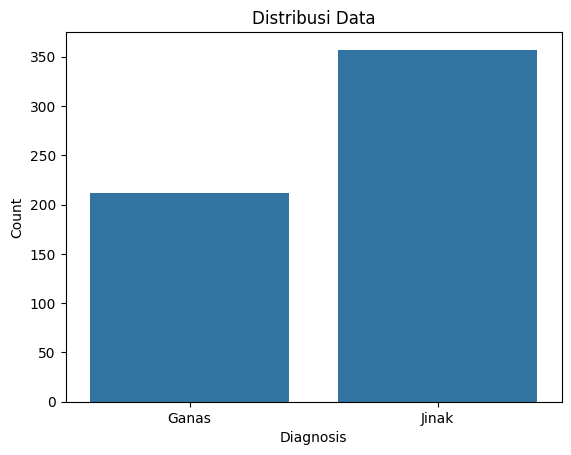

In [8]:
sns.countplot(data=df, x='diagnosis', order=['M', 'B'])
plt.title('Distribusi Data')
plt.xlabel('Diagnosis')
plt.ylabel('Count')
plt.xticks([0, 1], ['Ganas', 'Jinak'])
plt.show()

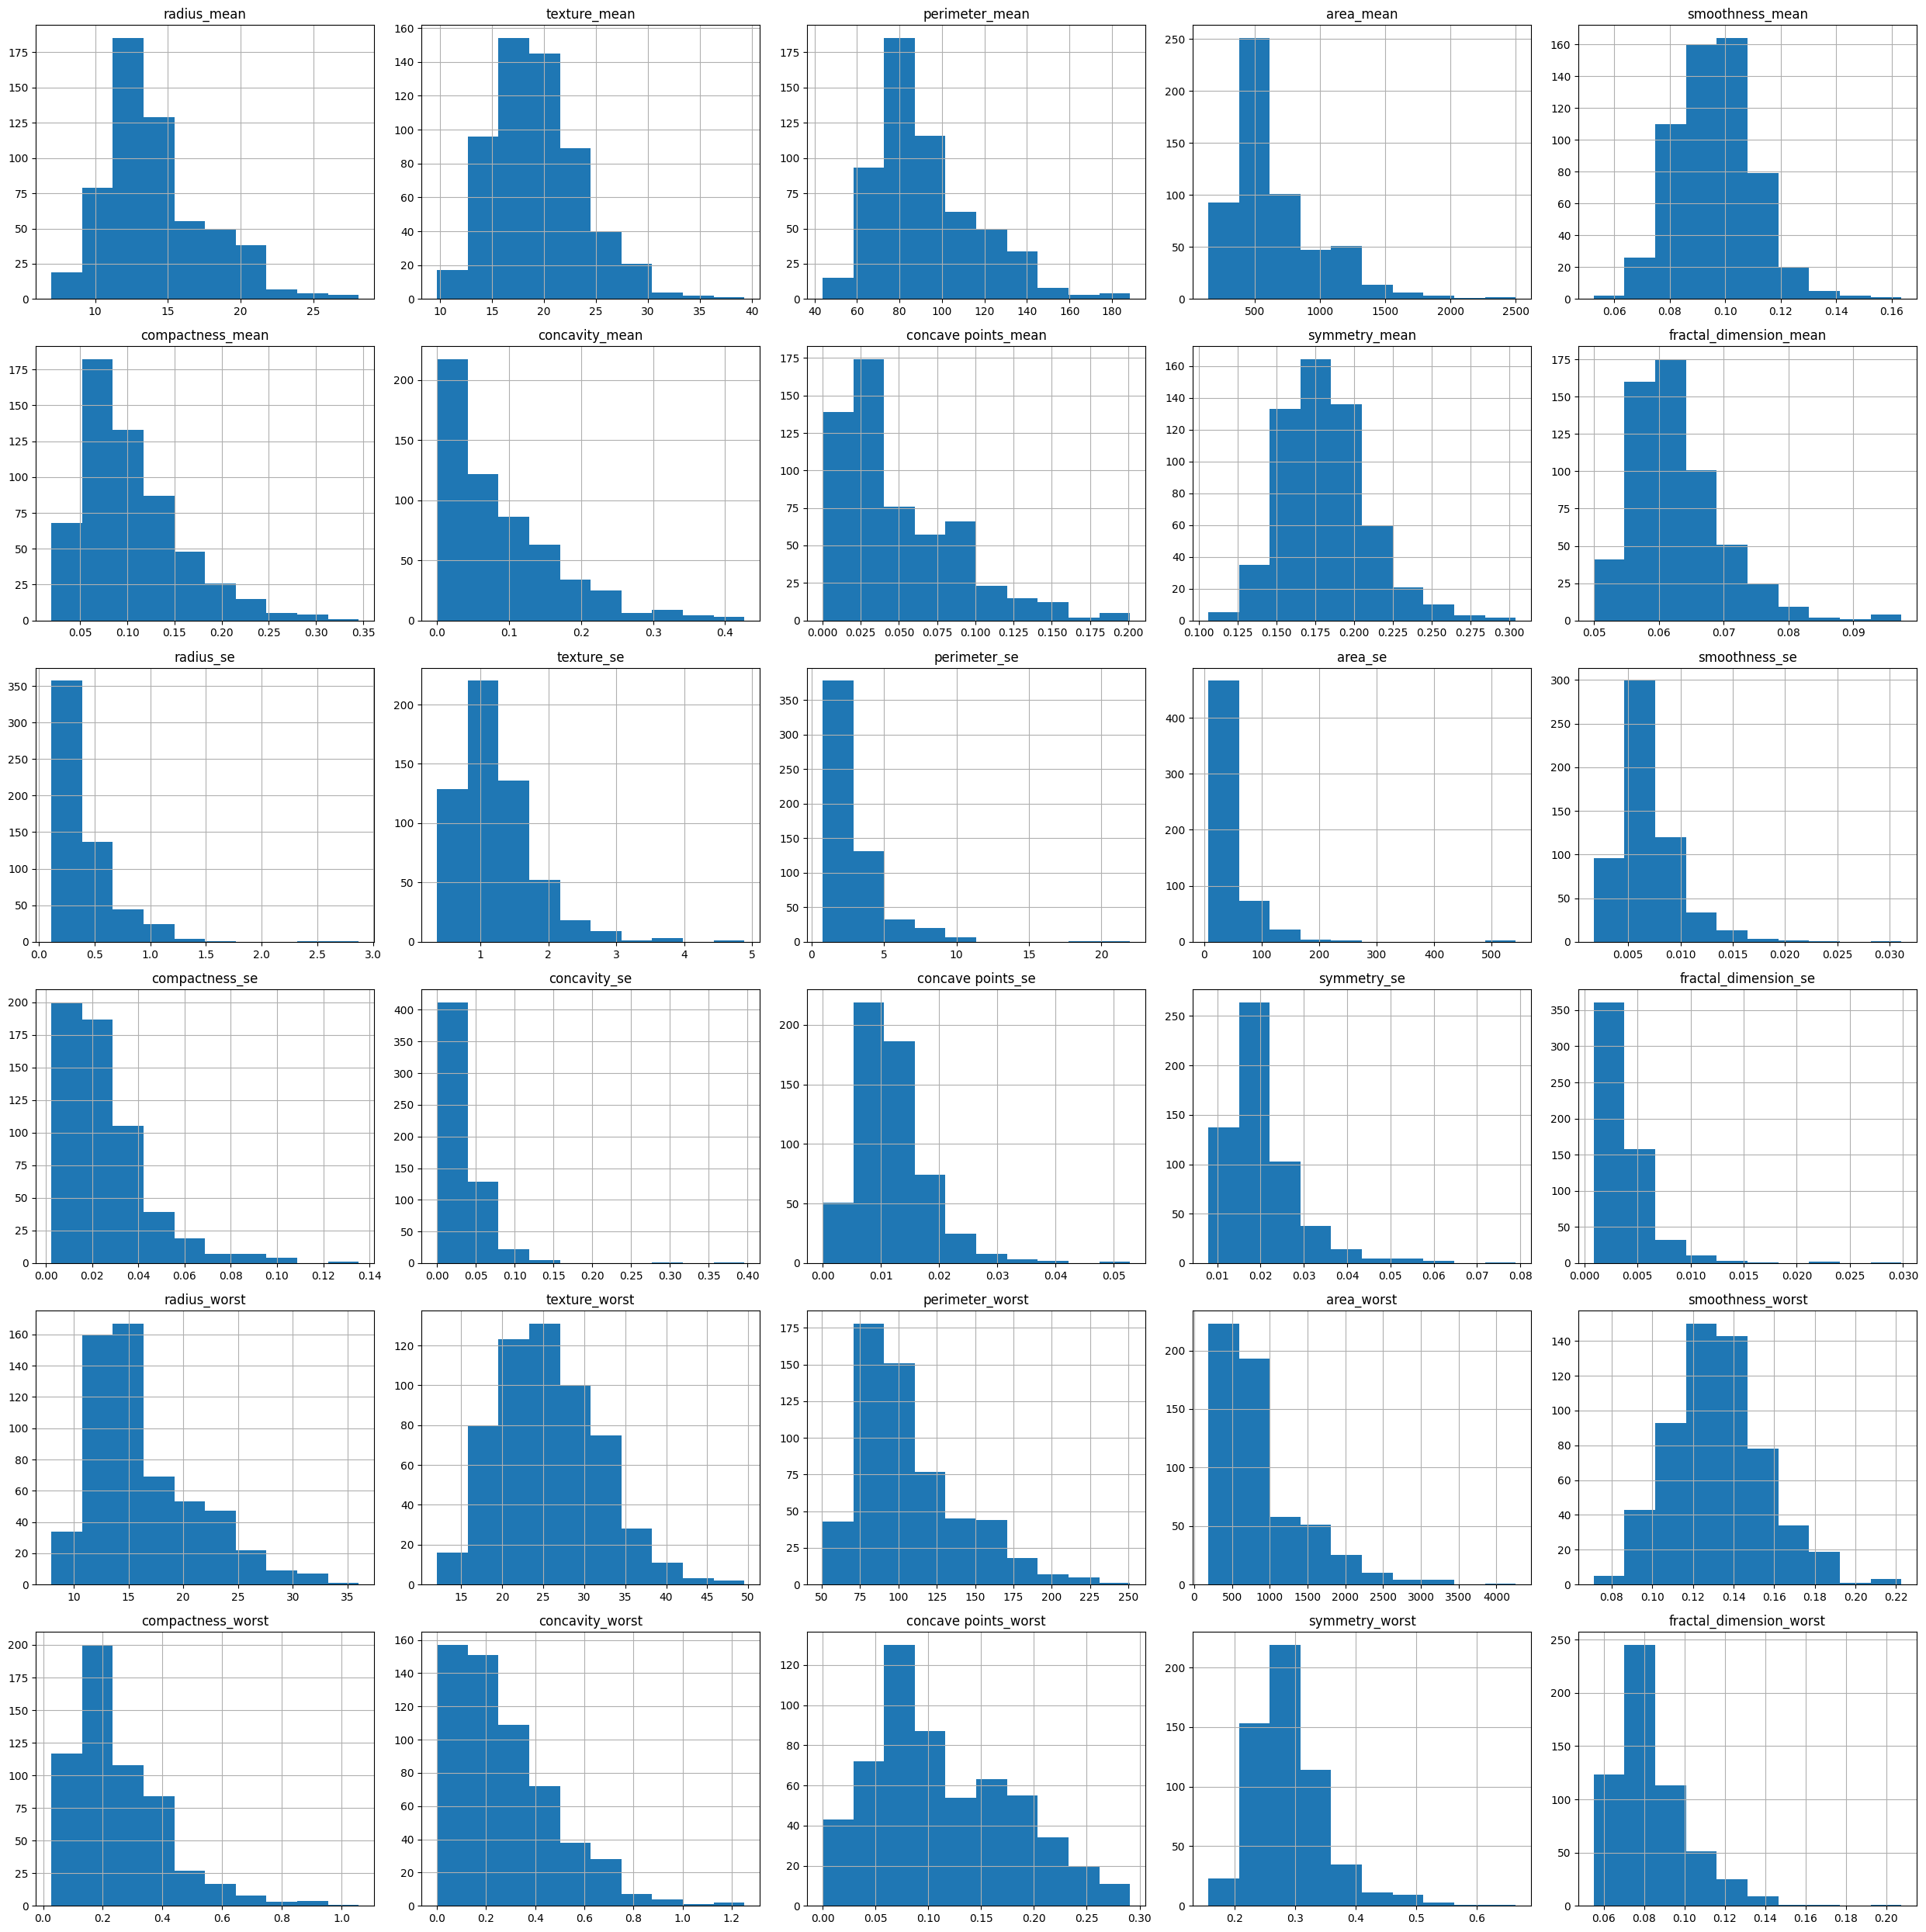

In [9]:
df.hist(figsize=(25,25))
plt.tight_layout()

In [10]:
df['diagnosis'] = df['diagnosis'].map({'M': 1, 'B': 0})

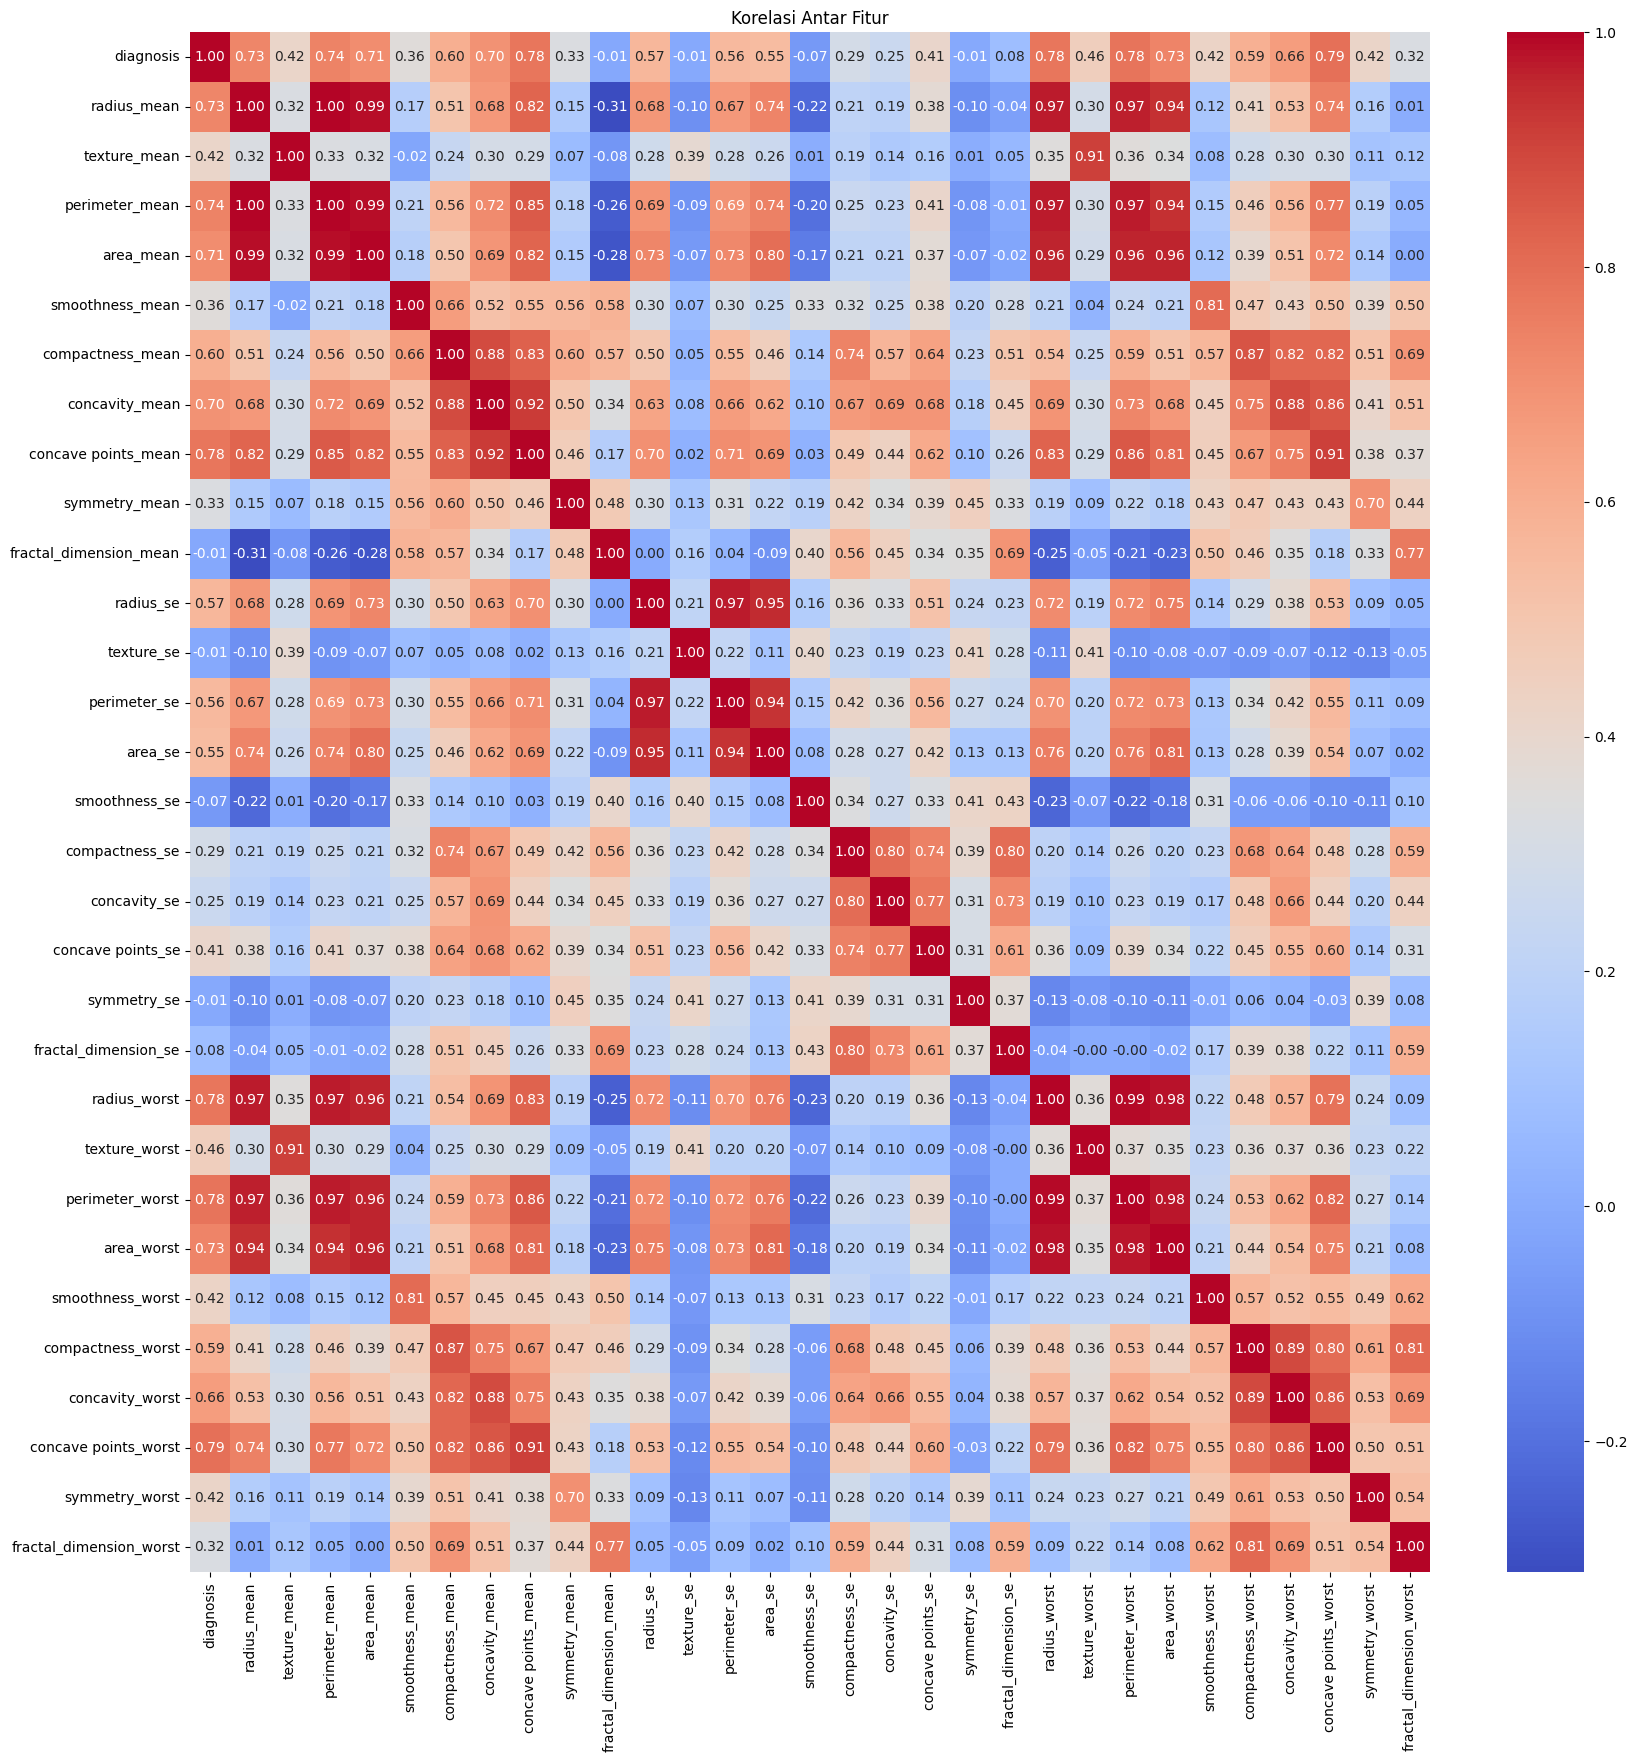

In [11]:
numeric_columns = df.select_dtypes(include=[np.number]).columns
correlation_matrix = df[numeric_columns].corr()

plt.figure(figsize=(20, 20))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm')
plt.title("Korelasi Antar Fitur")
plt.show()

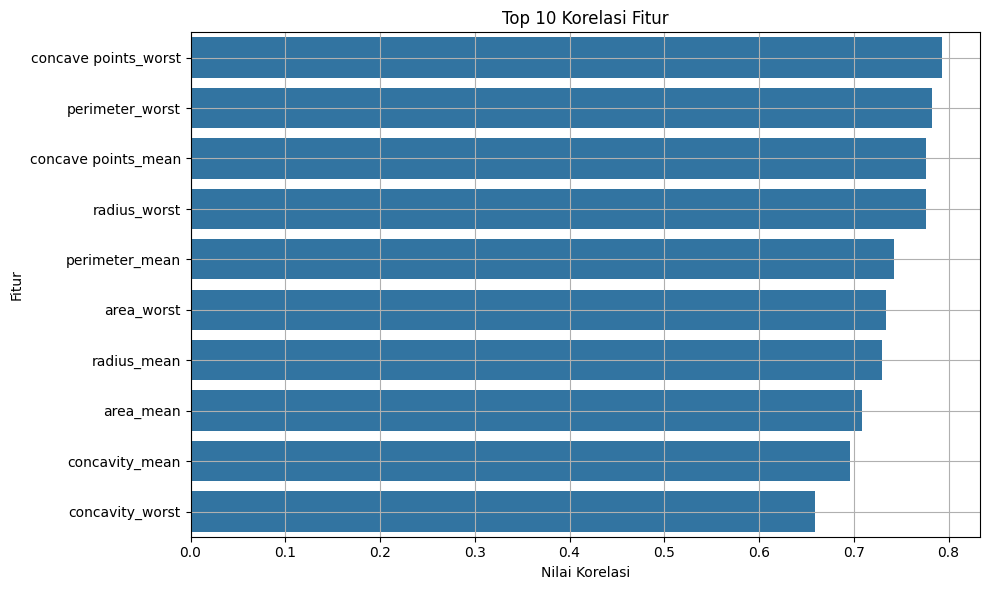

In [12]:
corr_with_target = df.corr(numeric_only=True)['diagnosis'].sort_values(ascending=False)
top_fitur = corr_with_target.drop('diagnosis').head(10)

fig, ax = plt.subplots(figsize=(10, 6))
colors = sns.color_palette("husl", len(top_fitur))
sns.barplot(x=top_fitur.values, y=top_fitur.index)
plt.title('Top 10 Korelasi Fitur')
plt.xlabel('Nilai Korelasi')
plt.ylabel('Fitur')
plt.tight_layout()
plt.grid(True)
plt.show()

# **5. Data Preprocessing**

Pada tahap ini, data preprocessing adalah langkah penting untuk memastikan kualitas data sebelum digunakan dalam model machine learning.

Jika Anda menggunakan data teks, data mentah sering kali mengandung nilai kosong, duplikasi, atau rentang nilai yang tidak konsisten, yang dapat memengaruhi kinerja model. Oleh karena itu, proses ini bertujuan untuk membersihkan dan mempersiapkan data agar analisis berjalan optimal.

Berikut adalah tahapan-tahapan yang bisa dilakukan, tetapi **tidak terbatas** pada:
1. Menghapus atau Menangani Data Kosong (Missing Values)
2. Menghapus Data Duplikat
3. Normalisasi atau Standarisasi Fitur
4. Deteksi dan Penanganan Outlier
5. Encoding Data Kategorikal
6. Binning (Pengelompokan Data)

Cukup sesuaikan dengan karakteristik data yang kamu gunakan yah. Khususnya ketika kami menggunakan data tidak terstruktur.

In [13]:
df.isnull().sum()

,0
diagnosis,0
radius_mean,0
texture_mean,0
perimeter_mean,0
area_mean,0
smoothness_mean,0
compactness_mean,0
concavity_mean,0
concave points_mean,0
symmetry_mean,0


In [14]:
duplicate = df.duplicated().sum()
print(duplicate)

0


In [15]:
df = df.drop_duplicates()
print(duplicate)

0


In [16]:
numeric_cols = df.select_dtypes(include=np.number).columns

outlier_summary = {}

for feature in numeric_cols:
    Q1 = df[feature].quantile(0.25)
    Q3 = df[feature].quantile(0.75)
    IQR = Q3 - Q1

    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    outliers = df[(df[feature] < lower_bound) | (df[feature] > upper_bound)]
    outlier_summary[feature] = len(outliers)

for feature, count in outlier_summary.items():
    print(f"Jumlah Outlier ({feature}): {count}")

Jumlah Outlier (diagnosis): 0
Jumlah Outlier (radius_mean): 14
Jumlah Outlier (texture_mean): 7
Jumlah Outlier (perimeter_mean): 13
Jumlah Outlier (area_mean): 25
Jumlah Outlier (smoothness_mean): 6
Jumlah Outlier (compactness_mean): 16
Jumlah Outlier (concavity_mean): 18
Jumlah Outlier (concave points_mean): 10
Jumlah Outlier (symmetry_mean): 15
Jumlah Outlier (fractal_dimension_mean): 15
Jumlah Outlier (radius_se): 38
Jumlah Outlier (texture_se): 20
Jumlah Outlier (perimeter_se): 38
Jumlah Outlier (area_se): 65
Jumlah Outlier (smoothness_se): 30
Jumlah Outlier (compactness_se): 28
Jumlah Outlier (concavity_se): 22
Jumlah Outlier (concave points_se): 19
Jumlah Outlier (symmetry_se): 27
Jumlah Outlier (fractal_dimension_se): 28
Jumlah Outlier (radius_worst): 17
Jumlah Outlier (texture_worst): 5
Jumlah Outlier (perimeter_worst): 15
Jumlah Outlier (area_worst): 35
Jumlah Outlier (smoothness_worst): 7
Jumlah Outlier (compactness_worst): 16
Jumlah Outlier (concavity_worst): 12
Jumlah Outli

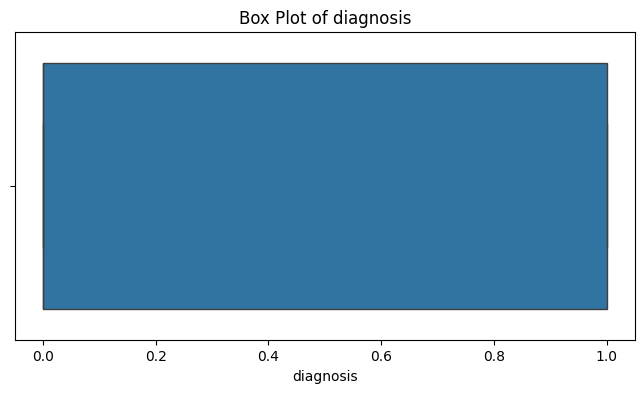

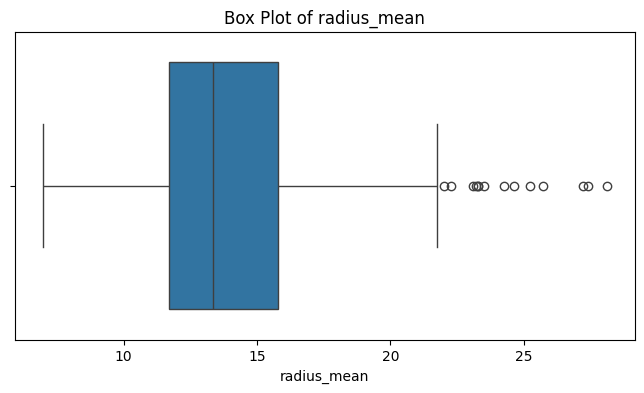

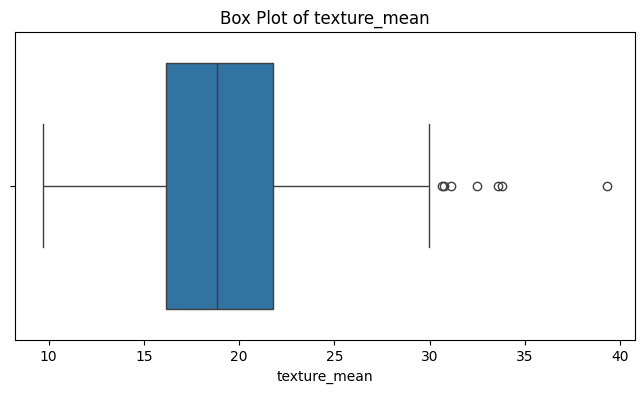

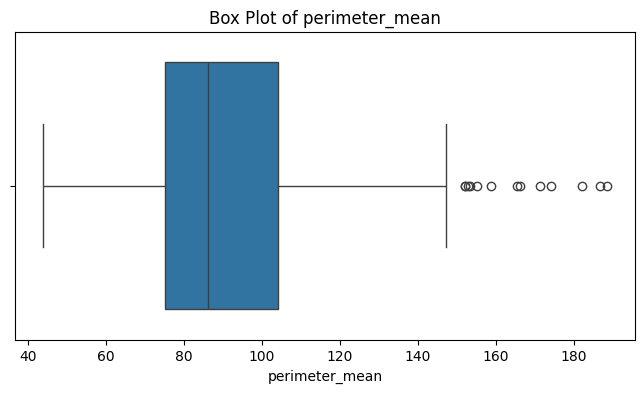

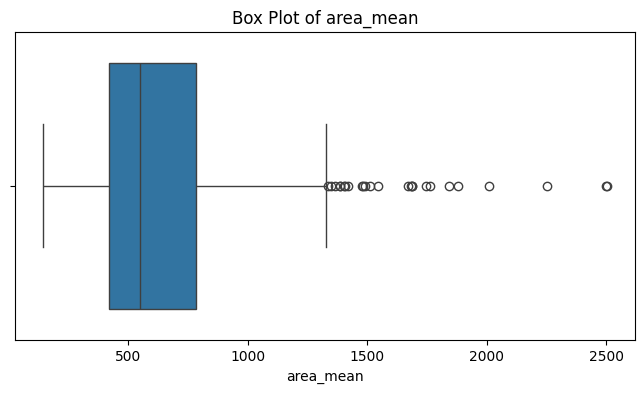

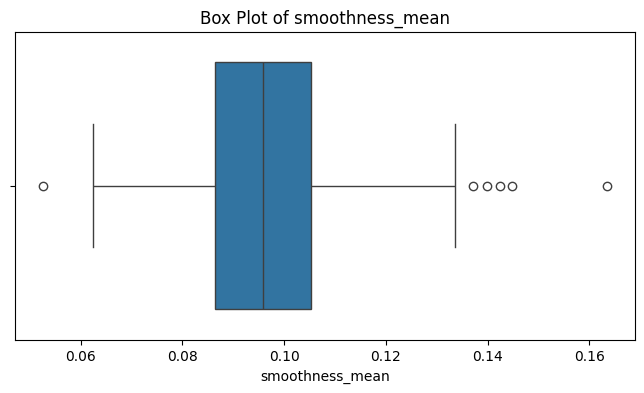

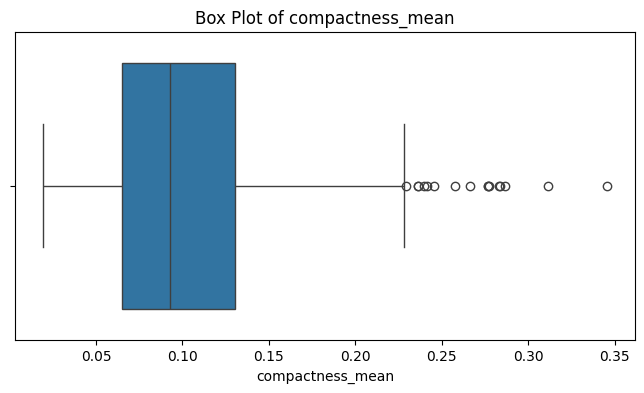

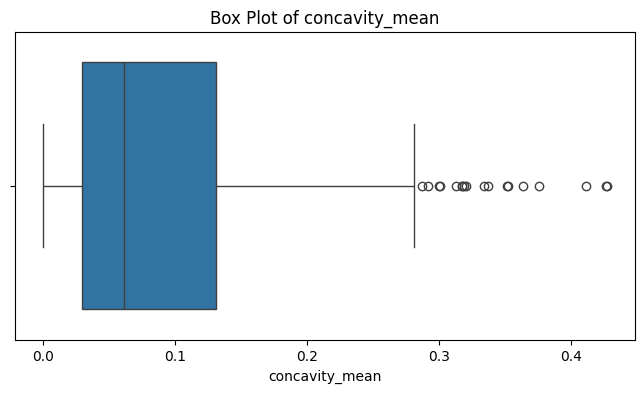

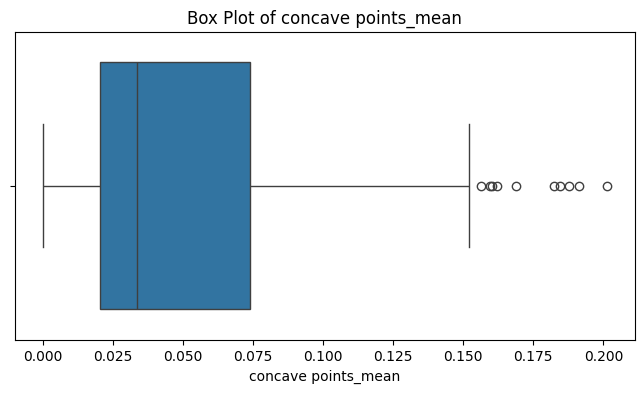

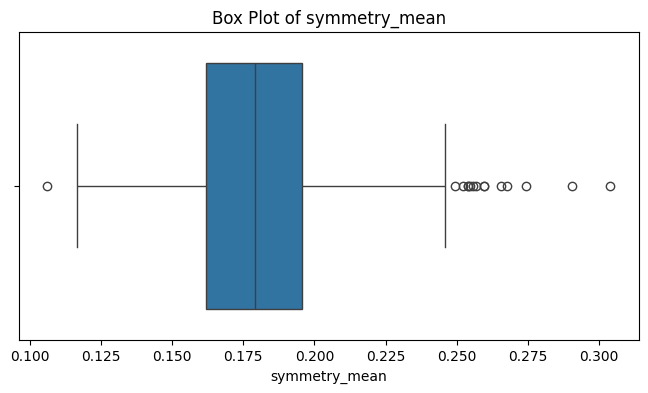

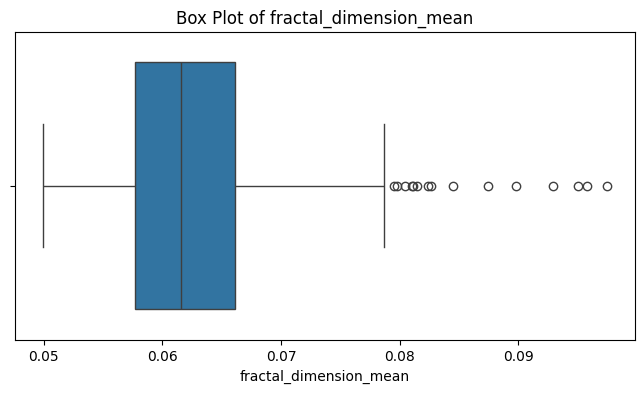

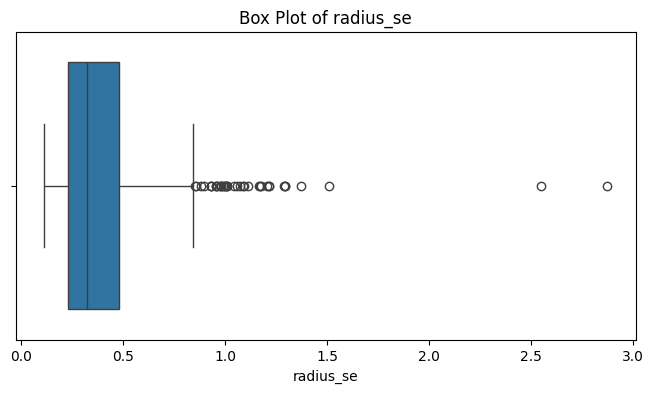

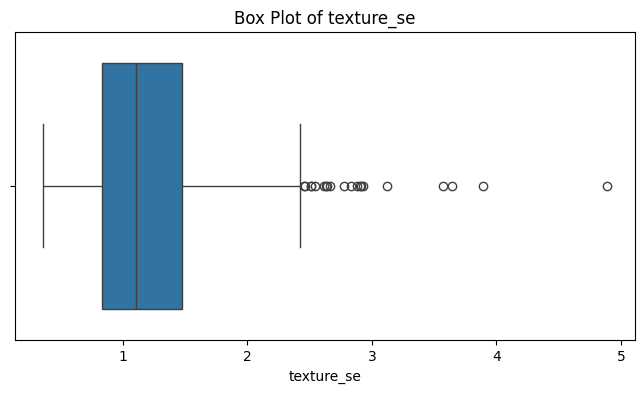

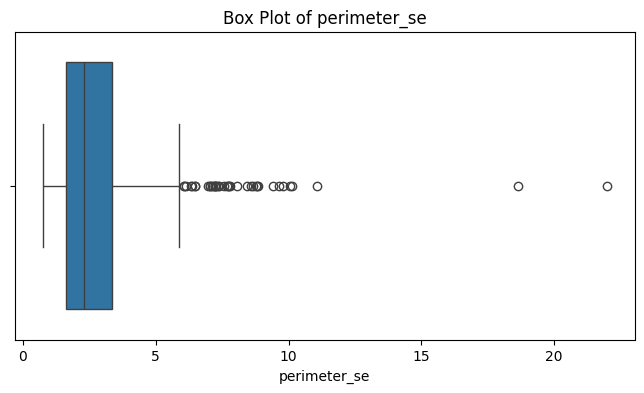

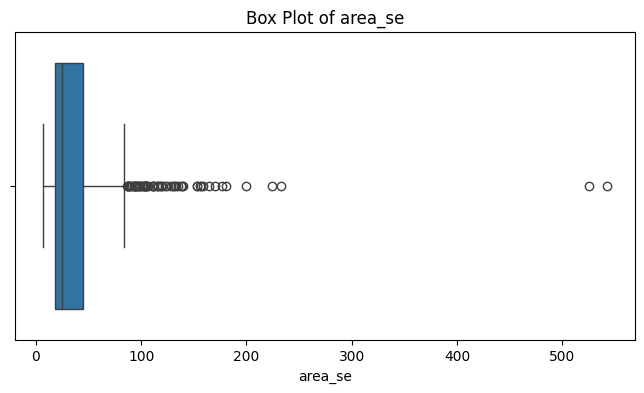

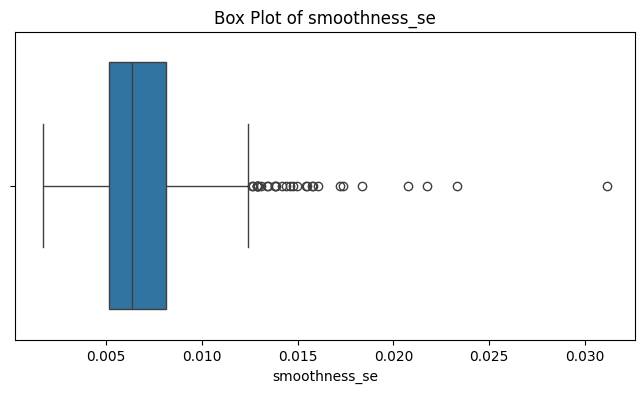

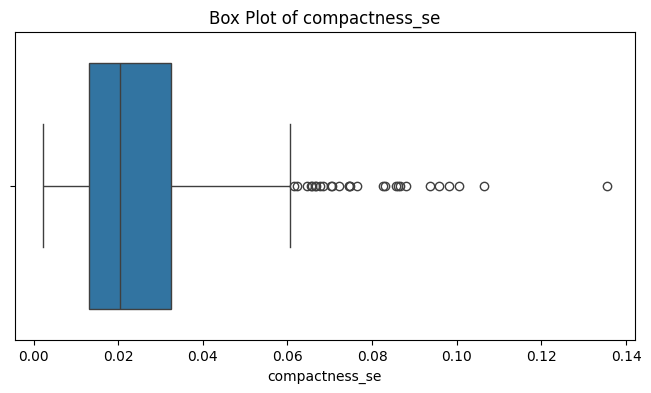

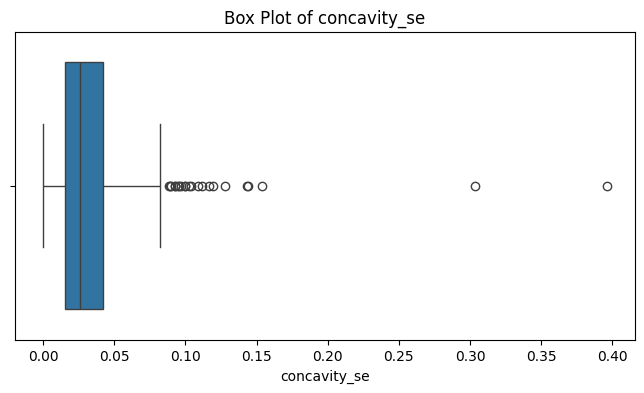

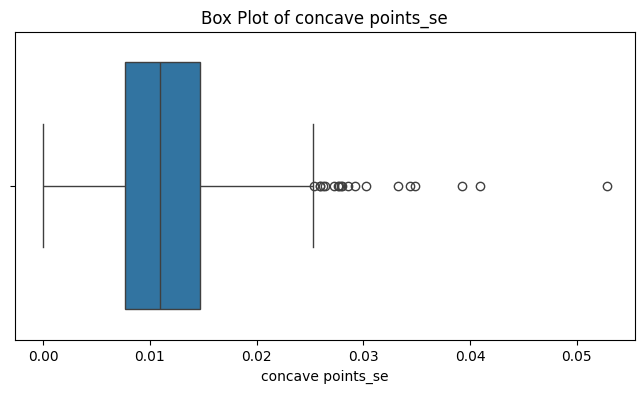

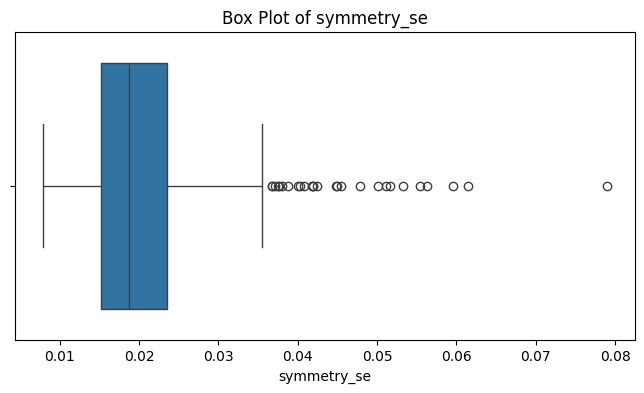

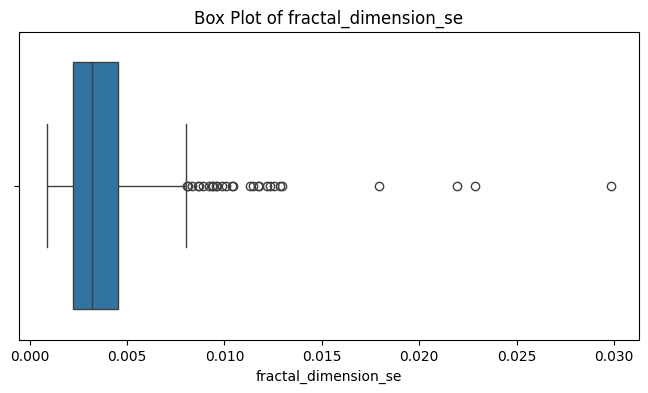

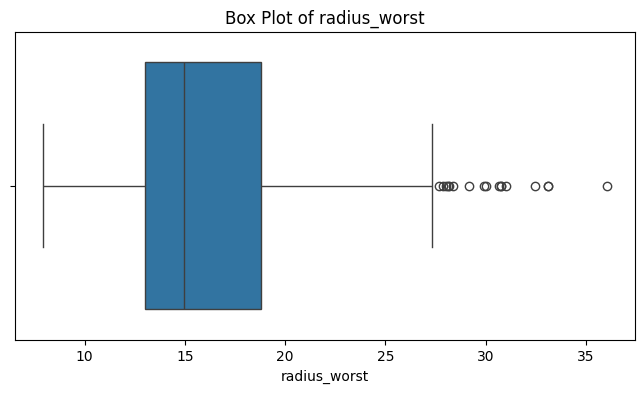

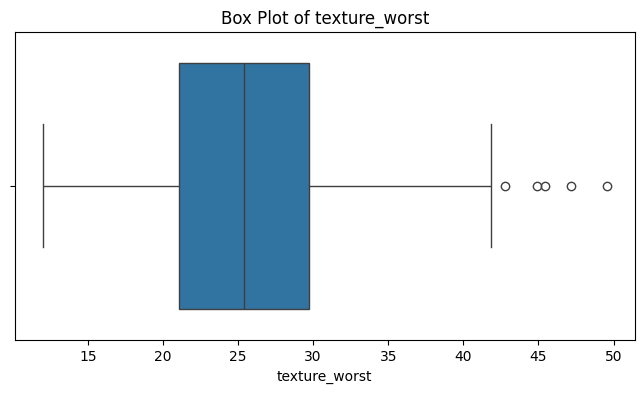

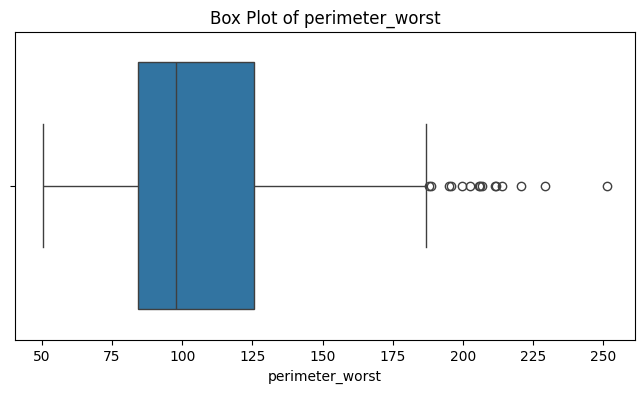

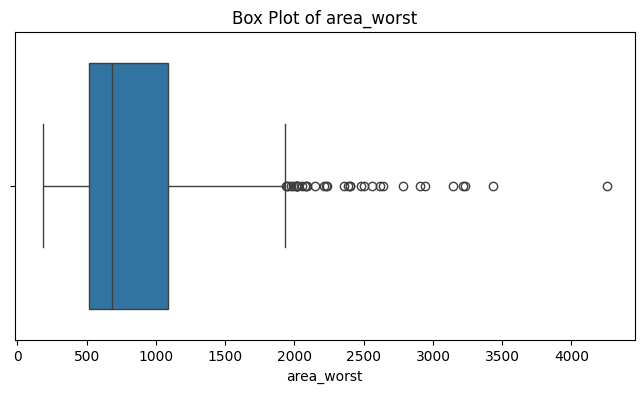

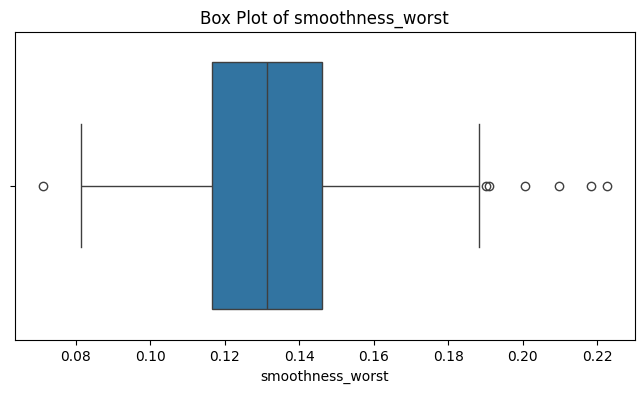

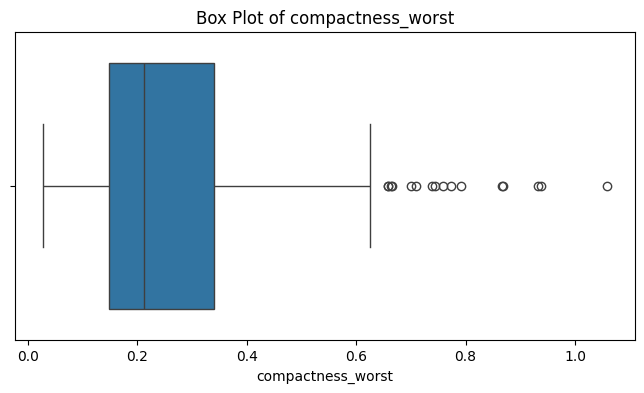

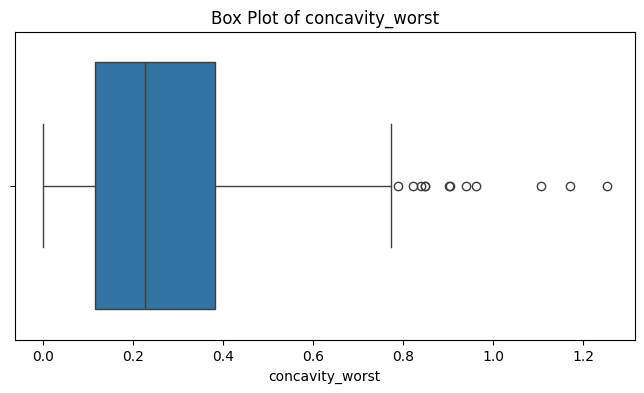

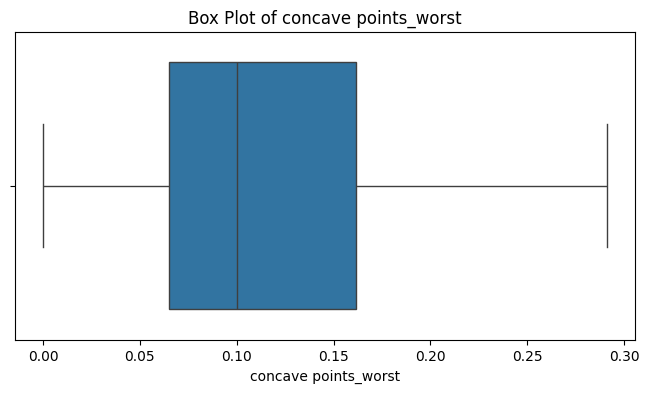

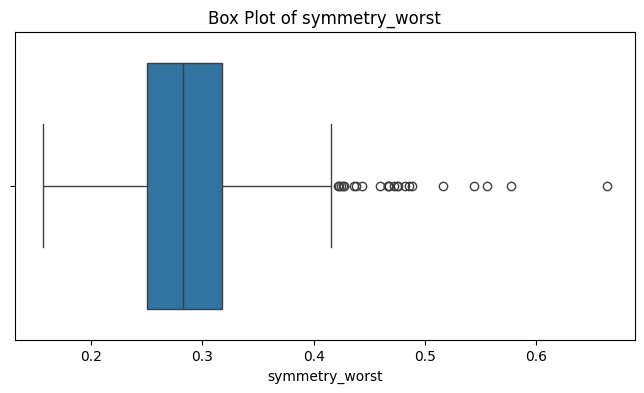

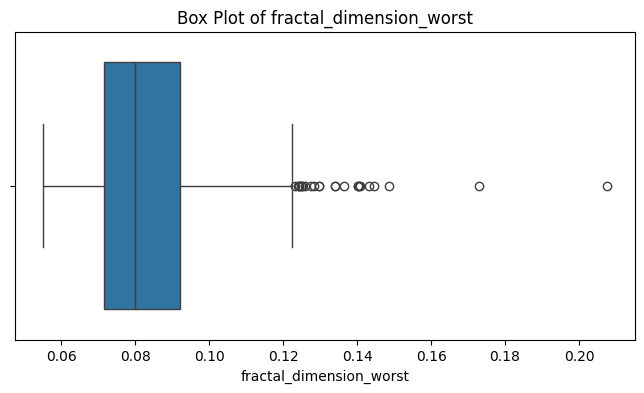

In [17]:
for feature in numeric_cols:
    plt.figure(figsize=(8, 4))
    sns.boxplot(x=df[feature])
    plt.title(f'Box Plot of {feature}')
    plt.show()

In [18]:
X = df.drop(columns=['diagnosis'])
y = df['diagnosis']

In [19]:
X_train, X_test, y_train, y_test = train_test_split(
    X,
    y,
    test_size=0.2,
    random_state=42,
    stratify=y
)

In [20]:
scaler = RobustScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)